# **Berlin House Prices Prediction**

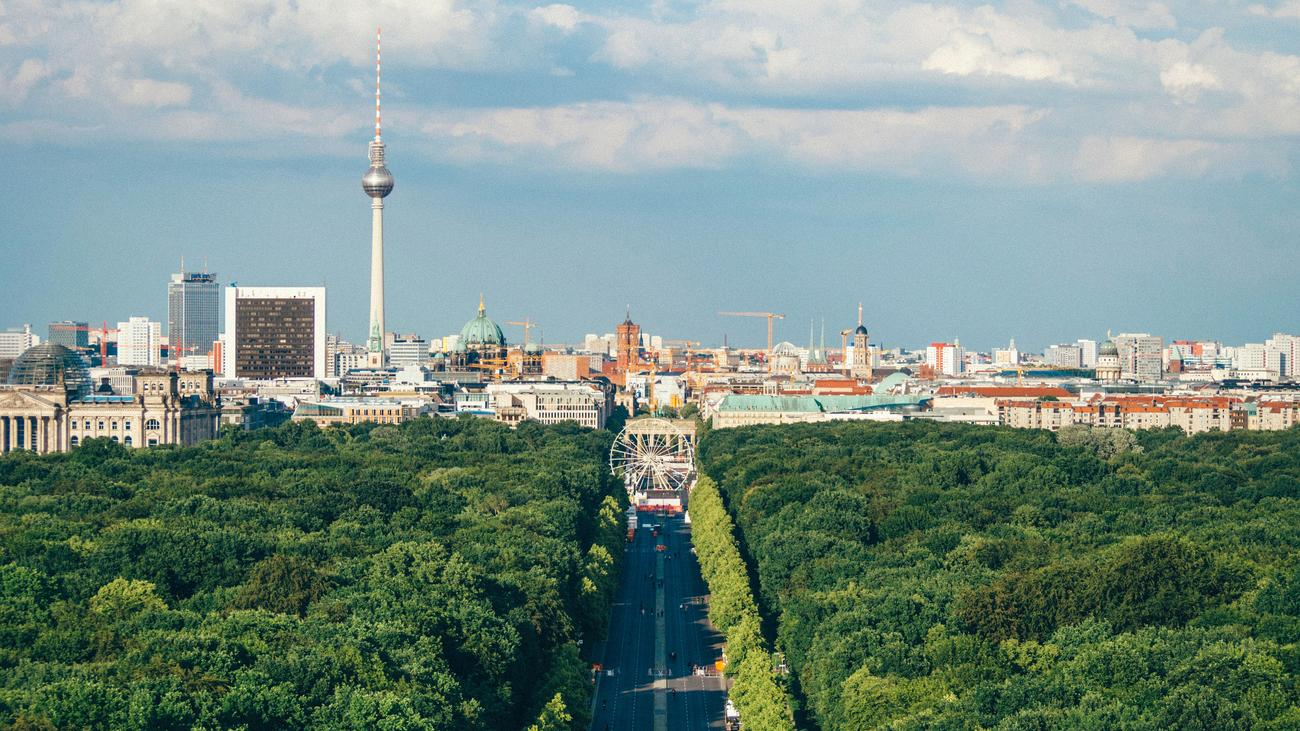

Berlin used to be an affordable place not so long ago. When I moved to Berlin, my uncle was paying around 580 euros for a one-bedroom apartment in the Mitte neighborhood. From there, you could walk through history, art, and culture without even taking a bus. Things have changed since then. Berliners not only need to compete between thousands of applications to find a place, but also they need to pay hefty rents to secure what they want.

I want to investigate this matter and answer some questions. More importantly, I decided to make a machine learning model predicting the rent prices in Berlin using different features. Since there are not many public datasets about berlin house prices available out there, I used a kaggle dataset. [This dataset](https://www.kaggle.com/corrieaar/apartment-rental-offers-in-germany) contains apartment rental offers in Germany from the dates 2018-09-22, 2019-05-10, and 2019-10-08 (Collected from [immobilienscout24](https://www.immobilienscout24.de)). I filtered out Berlin listings to work on it exclusively.
The berlin dataset is available on my Github.

## Data Gathering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Gather data from original dataset

# url='https://www.kaggle.com/corrieaar/apartment-rental-offers-in-germany'
# data = pd.read_csv(url)
# br = data[data.regio1 == 'Berlin']
# br.to_csv('berlin.csv', index=False)

In [2]:
raw = pd.read_csv('berlin.csv', lineterminator='\n')
raw.head(3)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Berlin,320.0,central_heating,NaN,NaN,False,True,10,4.99,NaN,...,Berlin,Staaken_Spandau,Diese attraktive EG-Wohnung kann ab sofort bez...,NaN,NaN,NaN,NaN,NaN,NaN,Feb20
1,Berlin,79.0,central_heating,ONE_YEAR_FREE,NaN,False,False,17,7.35,40.0,...,Berlin,Weißensee_Weißensee,Suchen Sie eine 2-Zimmerwohnung in Weißensee? ...,Zusammengefasst bietet die Wohnung:\n+ Vollstä...,68.0,NaN,NaN,NaN,NaN,Oct19
2,Berlin,150.0,floor_heating,ONE_YEAR_FREE,NaN,True,True,15,6.60,40.0,...,Berlin,Mitte_Mitte,Dieses luxuriöse Neubauquartier direkt am Luis...,"• sehr ruhig gelegen, trotz zentraler Lage, da...",NaN,NaN,NaN,NaN,NaN,Oct19


In [3]:
# Check the shape
raw.shape

(10406, 49)

In [4]:
# Get basic info
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10406 entries, 0 to 10405
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   regio1                    10406 non-null  object 
 1   serviceCharge             10171 non-null  float64
 2   heatingType               8935 non-null   object 
 3   telekomTvOffer            8994 non-null   object 
 4   telekomHybridUploadSpeed  918 non-null    float64
 5   newlyConst                10406 non-null  bool   
 6   balcony                   10406 non-null  bool   
 7   picturecount              10406 non-null  int64  
 8   pricetrend                10381 non-null  float64
 9   telekomUploadSpeed        8993 non-null   float64
 10  totalRent                 9744 non-null   float64
 11  yearConstructed           8981 non-null   float64
 12  scoutId                   10406 non-null  int64  
 13  noParkSpaces              2013 non-null   float64
 14  firing

In [5]:
# Numerical column
raw.select_dtypes(include=['number']).head(2)

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
0,320.0,NaN,10,4.99,NaN,1140.0,NaN,115671495,1.0,NaN,...,3.0,NaN,0.0,3.0,3,3,NaN,NaN,NaN,NaN
1,79.0,NaN,17,7.35,40.0,955.0,1918.0,113359456,NaN,1.0,...,2.0,100.4,0.0,3.0,2,3,68.0,NaN,NaN,NaN


In [6]:
raw.select_dtypes(include=['object']).head(2)

,regio1,heatingType,telekomTvOffer,firingTypes,geo_bln,houseNumber,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,typeOfFlat,regio2,regio3,description,facilities,energyEfficiencyClass,date
0,Berlin,central_heating,NaN,NaN,Berlin,63,Berlin,NaN,NaN,negotiable,Metropolitan Park,Metropolitan_Park,ground_floor,Berlin,Staaken_Spandau,Diese attraktive EG-Wohnung kann ab sofort bez...,NaN,NaN,Feb20
1,Berlin,central_heating,ONE_YEAR_FREE,gas,Berlin,11,Berlin,refurbished,NaN,negotiable,B&ouml;rnestra&szlig;e,Börnestraße,ground_floor,Berlin,Weißensee_Weißensee,Suchen Sie eine 2-Zimmerwohnung in Weißensee? ...,Zusammengefasst bietet die Wohnung:\n+ Vollstä...,NaN,Oct19


## Validate and Clean

In [7]:
# Time to check columns and clean!
df = raw.copy()
df.head(2)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Berlin,320.0,central_heating,NaN,NaN,False,True,10,4.99,NaN,...,Berlin,Staaken_Spandau,Diese attraktive EG-Wohnung kann ab sofort bez...,NaN,NaN,NaN,NaN,NaN,NaN,Feb20
1,Berlin,79.0,central_heating,ONE_YEAR_FREE,NaN,False,False,17,7.35,40.0,...,Berlin,Weißensee_Weißensee,Suchen Sie eine 2-Zimmerwohnung in Weißensee? ...,Zusammengefasst bietet die Wohnung:\n+ Vollstä...,68.0,NaN,NaN,NaN,NaN,Oct19


In [8]:
# If there is any missing values
df.isnull().sum()

regio1                         0
serviceCharge                235
heatingType                 1471
telekomTvOffer              1412
telekomHybridUploadSpeed    9488
newlyConst                     0
balcony                        0
picturecount                   0
pricetrend                    25
telekomUploadSpeed          1413
totalRent                    662
yearConstructed             1425
scoutId                        0
noParkSpaces                8393
firingTypes                 2284
hasKitchen                     0
geo_bln                        0
cellar                         0
yearConstructedRange        1425
baseRent                       0
houseNumber                 1527
livingSpace                    0
geo_krs                        0
condition                   2268
interiorQual                4208
petsAllowed                 4838
street                         0
streetPlain                 1527
lift                           0
baseRentRange                  0
typeOfFlat

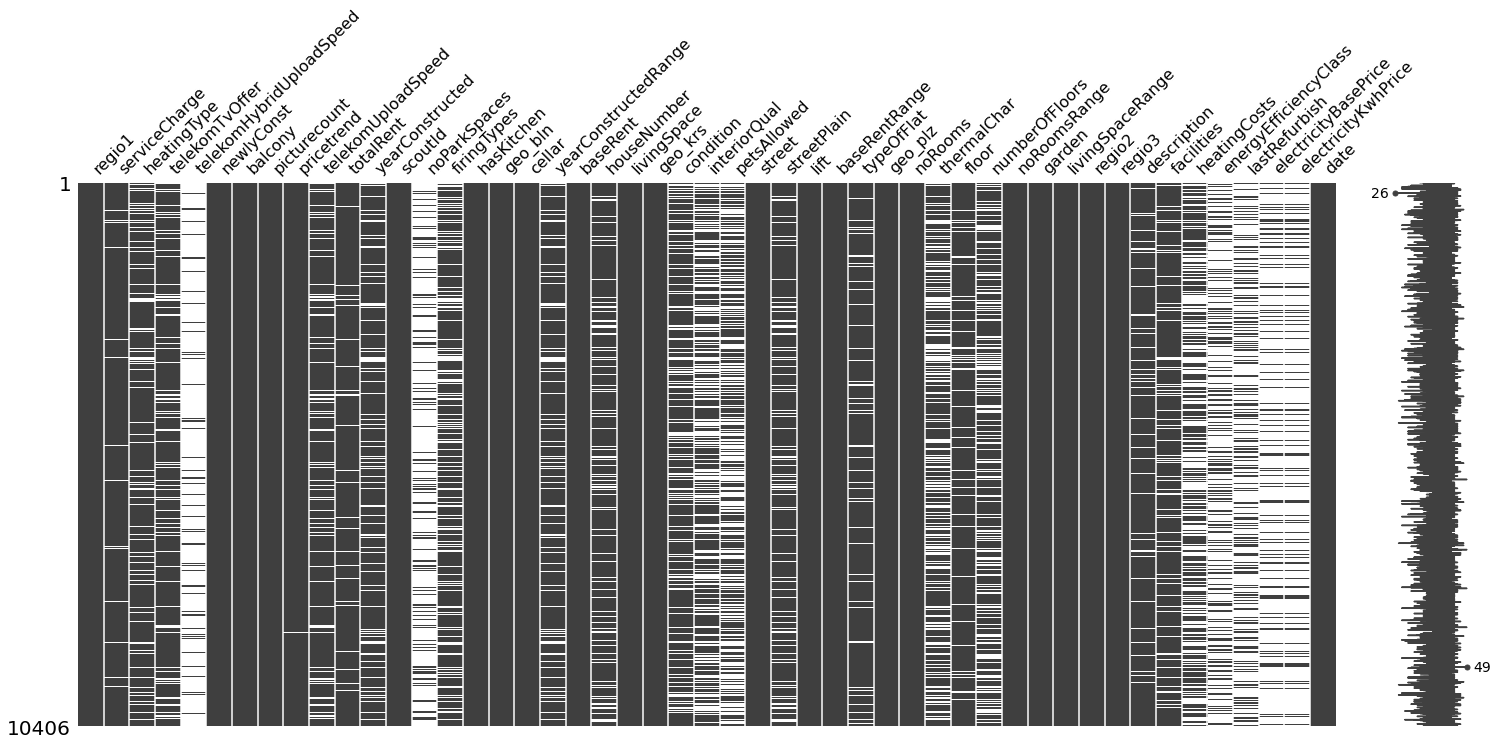

In [9]:
# Plot missing values
msno.matrix(raw)

In [10]:
df.shape

(10406, 49)

### Columns with mostly missed values

In [11]:
# Drop columns that are mostly missed
missed_cols = ['telekomHybridUploadSpeed','noParkSpaces','energyEfficiencyClass','lastRefurbish',
               'electricityBasePrice', 'electricityKwhPrice', 'interiorQual', 'petsAllowed']
df.drop(missed_cols, axis=1, inplace=True)
df.shape

(10406, 41)

### Rows with no rent value

In [12]:
# Drop rows where no rent is specified
df = df[~df.totalRent.isnull()]
df.shape

(9744, 41)

### Columns with one (dominated) value

In [13]:
# Check suspected columns with one value
df.regio1.value_counts()

Berlin    9744
Name: regio1, dtype: int64

In [14]:
df.telekomTvOffer.value_counts()

ONE_YEAR_FREE    8383
ON_DEMAND          30
NONE               11
Name: telekomTvOffer, dtype: int64

In [15]:
df.newlyConst.value_counts()

False    8227
True     1517
Name: newlyConst, dtype: int64

In [16]:
df.geo_krs.value_counts()

Berlin    9744
Name: geo_krs, dtype: int64

In [17]:
df.condition.value_counts()

first_time_use                        1646
well_kept                             1620
modernized                            1067
mint_condition                         986
first_time_use_after_refurbishment     933
refurbished                            606
fully_renovated                        604
need_of_renovation                      65
negotiable                              44
Name: condition, dtype: int64

In [18]:
df.typeOfFlat.value_counts()

apartment              6251
ground_floor            909
roof_storey             884
maisonette              260
other                   212
raised_ground_floor     194
penthouse               154
terraced_flat           129
loft                     53
half_basement            22
Name: typeOfFlat, dtype: int64

In [19]:
# Zipcode
df.geo_plz.value_counts()

10557    366
10115    256
10117    212
12555    197
10245    183
        ... 
12501      1
14159      1
12525      1
11014      1
10177      1
Name: geo_plz, Length: 214, dtype: int64

In [20]:
df.regio2.value_counts()

Berlin    9744
Name: regio2, dtype: int64

In [21]:
df.regio3.value_counts()

Mitte_Mitte                        764
Tiergarten_Tiergarten              731
Charlottenburg_Charlottenburg      642
Friedrichshain_Friedrichshain      489
Prenzlauer_Berg_Prenzlauer_Berg    415
                                  ... 
Falkenberg_Hohenschönhausen          4
Lübars_Reinickendorf                 3
Gatow_Spandau                        3
Rummelsburg_Lichtenberg              2
Malchow_Hohenschönhausen             1
Name: regio3, Length: 79, dtype: int64

In [22]:
df.date.value_counts()

May19    2667
Feb20    2631
Oct19    2570
Sep18    1876
Name: date, dtype: int64

In [23]:
# Drop one-value columns
one_value_cols = ['regio1','regio2', 'geo_krs', 'geo_bln']
df.drop(one_value_cols, axis=1, inplace=True)
df.shape

(9744, 37)

### Fill-in/Modify other columns

In [24]:
df.isnull().sum()

serviceCharge            185
heatingType             1373
telekomTvOffer          1320
newlyConst                 0
balcony                    0
picturecount               0
pricetrend                24
telekomUploadSpeed      1321
totalRent                  0
yearConstructed         1364
scoutId                    0
firingTypes             2174
hasKitchen                 0
cellar                     0
yearConstructedRange    1364
baseRent                   0
houseNumber             1375
livingSpace                0
condition               2173
street                     0
streetPlain             1375
lift                       0
baseRentRange              0
typeOfFlat               676
geo_plz                    0
noRooms                    0
thermalChar             3143
floor                    992
numberOfFloors          2829
noRoomsRange               0
garden                     0
livingSpaceRange           0
regio3                     0
description              571
facilities    

In [25]:
# serviceCharge
df.serviceCharge.value_counts().head(5)

150.0    306
100.0    261
200.0    256
250.0    178
120.0    174
Name: serviceCharge, dtype: int64

In [26]:
# Use median to fill-in charge price
df.serviceCharge.fillna(df.serviceCharge.median(), inplace=True)

In [27]:
# heatingType
df = df[~df.heatingType.isnull()]

In [28]:
# telekomTvOffer
df.telekomTvOffer.value_counts()

ONE_YEAR_FREE    7241
ON_DEMAND          28
NONE                8
Name: telekomTvOffer, dtype: int64

In [29]:
# Use NONE if not specified
df.telekomTvOffer.fillna('NONE', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [30]:
# pricetrend
df.pricetrend.value_counts()

7.59     179
7.56     154
8.70     153
10.09    131
8.55     130
        ... 
7.30       1
5.56       1
6.95       1
7.55       1
4.34       1
Name: pricetrend, Length: 426, dtype: int64

In [31]:
df.pricetrend.max()

12.87

In [32]:
# Fill-in with mean since it doesn't look noisy
df.pricetrend.fillna(df.pricetrend.mean(), inplace=True)

In [33]:
# telekomUploadSpeed
df.telekomUploadSpeed.value_counts()

40.0     5519
10.0     1312
2.4       421
5.0        21
1.0         2
100.0       1
Name: telekomUploadSpeed, dtype: int64

In [34]:
# Fill-in with majority
df.telekomUploadSpeed.fillna(df.telekomUploadSpeed.mode()[0], inplace=True)

In [35]:
# yearConstructed and yearConstructedRange
year = df[['yearConstructed', 'yearConstructedRange']]
year.head(10)

,yearConstructed,yearConstructedRange
0,NaN,NaN
1,1918.0,1.0
2,2019.0,9.0
3,2017.0,9.0
4,2019.0,9.0
5,2014.0,8.0
6,1980.0,3.0
8,1984.0,4.0
9,1988.0,4.0
10,1910.0,1.0


In [36]:
# Use median
df.yearConstructed.fillna(df.yearConstructed.median(), inplace=True)
df.yearConstructedRange.fillna(df.yearConstructedRange.median(), inplace=True)

In [37]:
df.isnull().sum()

serviceCharge              0
heatingType                0
telekomTvOffer             0
newlyConst                 0
balcony                    0
picturecount               0
pricetrend                 0
telekomUploadSpeed         0
totalRent                  0
yearConstructed            0
scoutId                    0
firingTypes             1440
hasKitchen                 0
cellar                     0
yearConstructedRange       0
baseRent                   0
houseNumber             1196
livingSpace                0
condition               1400
street                     0
streetPlain             1196
lift                       0
baseRentRange              0
typeOfFlat               442
geo_plz                    0
noRooms                    0
thermalChar             2393
floor                    713
numberOfFloors          2210
noRoomsRange               0
garden                     0
livingSpaceRange           0
regio3                     0
description              395
facilities    

In [38]:
# firingTypes
df.firingTypes.value_counts()

district_heating                                                       3193
gas                                                                    2194
oil                                                                     547
natural_gas_light                                                       300
combined_heat_and_power_fossil_fuels                                    175
natural_gas_heavy                                                       161
electricity                                                              75
geothermal                                                               48
pellet_heating                                                           36
steam_district_heating                                                   29
heat_supply                                                              20
local_heating                                                            20
gas:electricity                                                          17
solar_heatin

In [39]:
# Majority
df.firingTypes.fillna(df.firingTypes.mode()[0], inplace=True)

In [40]:
# condition
df.condition.value_counts()

well_kept                             1518
first_time_use                        1492
modernized                            1014
mint_condition                         864
first_time_use_after_refurbishment     857
fully_renovated                        562
refurbished                            559
need_of_renovation                      62
negotiable                              43
Name: condition, dtype: int64

In [41]:
# Categorize as 'not specified'
df.condition.fillna('not specified', inplace=True)

In [42]:
df.description.head()

0    Diese attraktive EG-Wohnung kann ab sofort bez...
1    Suchen Sie eine 2-Zimmerwohnung in Weißensee? ...
2    Dieses luxuriöse Neubauquartier direkt am Luis...
3    Bei dieser ansprechenden Immobilie handelt es ...
4    In the ""Wasserstadt - Mitte"" you can expect ...
Name: description, dtype: object

In [43]:
df.description.fillna('not specified', inplace=True)

In [44]:
df.facilities.head()

0                                                  NaN
1    Zusammengefasst bietet die Wohnung:\n+ Vollstä...
2    • sehr ruhig gelegen, trotz zentraler Lage, da...
3                               Balkon und 10m Terasse
4    Your spacious ground floor apartment is equipp...
Name: facilities, dtype: object

In [45]:
df.facilities.fillna('not specified', inplace=True)

In [46]:
df.isnull().sum()

serviceCharge              0
heatingType                0
telekomTvOffer             0
newlyConst                 0
balcony                    0
picturecount               0
pricetrend                 0
telekomUploadSpeed         0
totalRent                  0
yearConstructed            0
scoutId                    0
firingTypes                0
hasKitchen                 0
cellar                     0
yearConstructedRange       0
baseRent                   0
houseNumber             1196
livingSpace                0
condition                  0
street                     0
streetPlain             1196
lift                       0
baseRentRange              0
typeOfFlat               442
geo_plz                    0
noRooms                    0
thermalChar             2393
floor                    713
numberOfFloors          2210
noRoomsRange               0
garden                     0
livingSpaceRange           0
regio3                     0
description                0
facilities    

In [47]:
# typeOfFlat
df.typeOfFlat.value_counts()

apartment              5433
ground_floor            817
roof_storey             794
maisonette              239
raised_ground_floor     168
other                   168
penthouse               135
terraced_flat           108
loft                     48
half_basement            19
Name: typeOfFlat, dtype: int64

In [48]:
# Map to other section
df.typeOfFlat.fillna('other', inplace=True)

In [49]:
# Street case
street = df[['street','streetPlain']]
street.head()

,street,streetPlain
0,Metropolitan Park,Metropolitan_Park
1,B&ouml;rnestra&szlig;e,Börnestraße
2,Stallschreiberstra&szlig;e,Stallschreiberstraße
3,Hallesche Stra&szlig;e,Hallesche_Straße
4,Heidestra&szlig;e,Heidestraße


In [50]:
# Drop streetPlain which is the same column with Nan values
df.drop('streetPlain', axis=1, inplace=True)
df.shape

(8371, 36)

In [51]:
df.isnull().sum()

serviceCharge              0
heatingType                0
telekomTvOffer             0
newlyConst                 0
balcony                    0
picturecount               0
pricetrend                 0
telekomUploadSpeed         0
totalRent                  0
yearConstructed            0
scoutId                    0
firingTypes                0
hasKitchen                 0
cellar                     0
yearConstructedRange       0
baseRent                   0
houseNumber             1196
livingSpace                0
condition                  0
street                     0
lift                       0
baseRentRange              0
typeOfFlat                 0
geo_plz                    0
noRooms                    0
thermalChar             2393
floor                    713
numberOfFloors          2210
noRoomsRange               0
garden                     0
livingSpaceRange           0
regio3                     0
description                0
facilities                 0
heatingCosts  

In [52]:
# houseNumber
df.houseNumber.fillna('not specified', inplace=True)

In [53]:
# thermalChar
df.thermalChar.value_counts()

66.2     59
79.0     45
114.0    43
74.6     41
75.9     40
         ..
41.0      1
164.5     1
16.4      1
214.1     1
184.6     1
Name: thermalChar, Length: 1385, dtype: int64

In [54]:
df.thermalChar.fillna(df.thermalChar.median(), inplace=True)

In [55]:
floor = df[['floor','numberOfFloors']]
floor.head(10)

,floor,numberOfFloors
0,0.0,3.0
1,0.0,3.0
2,3.0,5.0
3,6.0,7.0
4,0.0,6.0
5,1.0,2.0
6,16.0,NaN
8,4.0,NaN
9,2.0,5.0
10,6.0,6.0


In [56]:
# Drop numberOfFloors which has too much missing values and its not important to our analysis
df.drop('numberOfFloors', axis=1, inplace=True)

In [57]:
# Assume if there is no floor specidied, then its 0
df.floor.fillna(0, inplace=True)

In [58]:
df.heatingCosts.value_counts()

100.00    193
60.00     190
70.00     174
50.00     163
80.00     149
         ... 
127.62      1
79.52       1
85.04       1
202.78      1
80.09       1
Name: heatingCosts, Length: 1323, dtype: int64

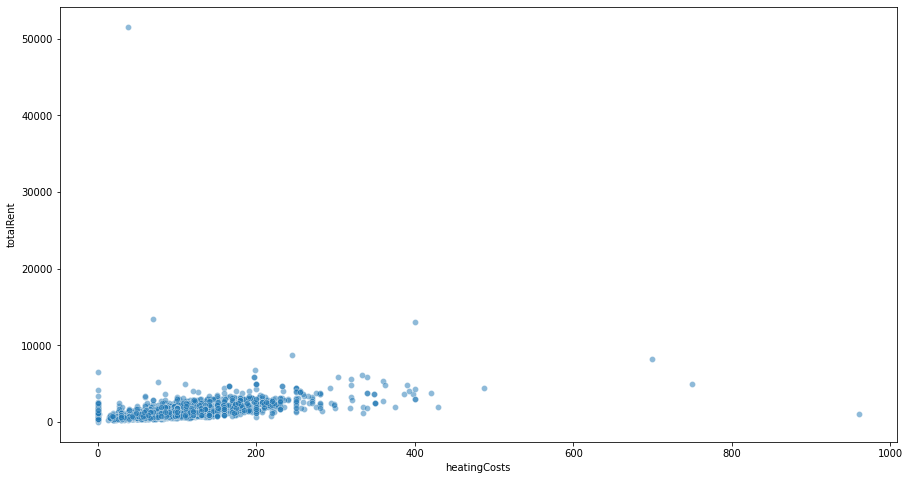

In [59]:
plt.figure(figsize = (15,8))
sns.scatterplot(x='heatingCosts', y='totalRent', data=df, alpha=0.5)

In [60]:
# Drop heatingCosts with a lot of missing values
# Maybe i will predict and fill it in future
df.drop('heatingCosts', axis=1, inplace=True)

In [61]:
df.isnull().sum()

serviceCharge           0
heatingType             0
telekomTvOffer          0
newlyConst              0
balcony                 0
picturecount            0
pricetrend              0
telekomUploadSpeed      0
totalRent               0
yearConstructed         0
scoutId                 0
firingTypes             0
hasKitchen              0
cellar                  0
yearConstructedRange    0
baseRent                0
houseNumber             0
livingSpace             0
condition               0
street                  0
lift                    0
baseRentRange           0
typeOfFlat              0
geo_plz                 0
noRooms                 0
thermalChar             0
floor                   0
noRoomsRange            0
garden                  0
livingSpaceRange        0
regio3                  0
description             0
facilities              0
date                    0
dtype: int64

## Feature Engineering

In [62]:
df2 = df.copy()
df2.shape

(8371, 34)

### Price per Sqft

In [63]:
df2['price_per_sqft'] = df2['totalRent'] / df2['livingSpace']
df2.head(3)

,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,...,thermalChar,floor,noRoomsRange,garden,livingSpaceRange,regio3,description,facilities,date,price_per_sqft
0,320.0,central_heating,NONE,False,True,10,4.99,40.0,1140.0,1975.0,...,108.0,0.0,3,False,3,Staaken_Spandau,Diese attraktive EG-Wohnung kann ab sofort bez...,not specified,Feb20,14.805195
1,79.0,central_heating,ONE_YEAR_FREE,False,False,17,7.35,40.0,955.0,1918.0,...,100.4,0.0,2,False,3,Weißensee_Weißensee,Suchen Sie eine 2-Zimmerwohnung in Weißensee? ...,Zusammengefasst bietet die Wohnung:\n+ Vollstä...,Oct19,15.248284
2,150.0,floor_heating,ONE_YEAR_FREE,True,True,15,6.60,40.0,1300.0,2019.0,...,108.0,3.0,2,False,2,Mitte_Mitte,Dieses luxuriöse Neubauquartier direkt am Luis...,"• sehr ruhig gelegen, trotz zentraler Lage, da...",Oct19,28.017241


### Borough

In [64]:
df2.regio3.value_counts()

Tiergarten_Tiergarten              675
Mitte_Mitte                        659
Charlottenburg_Charlottenburg      554
Friedrichshain_Friedrichshain      421
Prenzlauer_Berg_Prenzlauer_Berg    348
                                  ... 
Konradshöhe_Reinickendorf            3
Gatow_Spandau                        3
Lübars_Reinickendorf                 2
Rummelsburg_Lichtenberg              2
Malchow_Hohenschönhausen             1
Name: regio3, Length: 79, dtype: int64

In [65]:
# Delete duplicates in name
df2['regio3'] = df2['regio3'].apply(lambda x: x.split('_')[0])

#### Dimensionality reduction

In [66]:
# Number of unique values
len(df2.regio3.unique())

79

In [67]:
borough = df2['regio3'].value_counts(ascending=False)
borough_len = borough[borough<=80]
len(borough_len)

55

In [68]:
# Convert most unrepresented borough into 'Other Borough' category
df2.regio3 = df2.regio3.apply(lambda x: 'Other Borough' if x in borough_len else x)
len(df2.regio3.unique())

25

In [69]:
# Check if it worked
df2.regio3.head(5)

0    Other Borough
1        Weißensee
2            Mitte
3        Kreuzberg
4       Tiergarten
Name: regio3, dtype: object

### Date

In [70]:
df2.date.value_counts()

May19    2347
Feb20    2222
Oct19    2175
Sep18    1627
Name: date, dtype: int64

In [71]:
# Convert date dtype
dates = {'May19':'5-2019',
         'Oct19':'10-2019',
         'Feb20':'2-2020',
         'Sep18':'9-2018'}
df2['date'] = df2.date.map(dates)
df2['date'] = pd.to_datetime(df2['date'],format='%m-%Y')
df2.date.head(3)

0   2020-02-01
1   2019-10-01
2   2019-10-01
Name: date, dtype: datetime64[ns]

### Casting

In [72]:
df2['geo_plz'] = df2.geo_plz.astype('category')
df2['typeOfFlat'] = df2.typeOfFlat.astype('category')
df2['condition'] = df2.condition.astype('category')
df2['heatingType'] = df2.heatingType.astype('category')
df2['telekomTvOffer'] = df2.telekomTvOffer.astype('category')
df2['firingTypes'] = df2.firingTypes.astype('category')

In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8371 entries, 0 to 10405
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   serviceCharge         8371 non-null   float64       
 1   heatingType           8371 non-null   category      
 2   telekomTvOffer        8371 non-null   category      
 3   newlyConst            8371 non-null   bool          
 4   balcony               8371 non-null   bool          
 5   picturecount          8371 non-null   int64         
 6   pricetrend            8371 non-null   float64       
 7   telekomUploadSpeed    8371 non-null   float64       
 8   totalRent             8371 non-null   float64       
 9   yearConstructed       8371 non-null   float64       
 10  scoutId               8371 non-null   int64         
 11  firingTypes           8371 non-null   category      
 12  hasKitchen            8371 non-null   bool          
 13  cellar           

## Anomaly Detection

In [74]:
df3 = df2.copy()
df3.shape

(8371, 35)

### Domain Knowledge

In [75]:
weird_livingSpace = df3[df3.livingSpace < 20]
weird_livingSpace.shape

(89, 35)

In [76]:
df3.drop(weird_livingSpace.index, inplace=True)
df3.shape

(8282, 35)

### Using mean and standard deviation

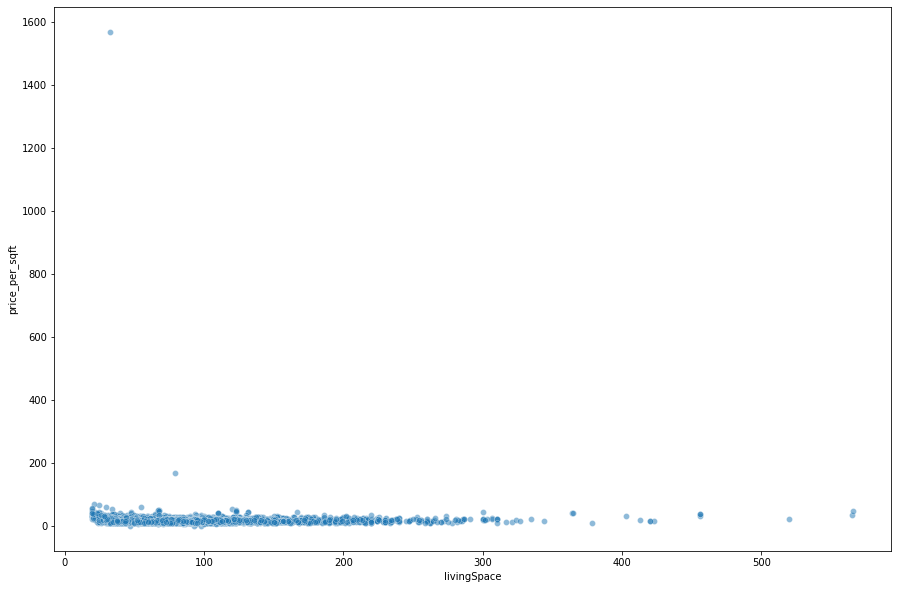

In [77]:
# plt.scatter(data=df, x='living_space', y='warm_price', alpha=0.3);
plt.figure(figsize=(15,10))
sns.scatterplot(x='livingSpace', y='price_per_sqft', data=df3, alpha=0.5)

In [78]:
def remove_outliers(df):
    new_df = pd.DataFrame()
    for key, subdf in df.groupby('regio3'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        cleaned_df = subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<=(mean+std))]
        new_df = pd.concat([new_df,cleaned_df],ignore_index=True)
    return new_df

In [79]:
df3 = remove_outliers(df3)
df3.shape

(6417, 35)

## Exploratory Data Analysis

In [80]:
eda = df3.copy()

### Most expensive house in Berlin to rent?

In [81]:
# Most expensive listing
expensive = eda[eda['totalRent'] == eda['totalRent'].max()]
expensive[['totalRent','livingSpace','noRooms','regio3','typeOfFlat']]

,totalRent,livingSpace,noRooms,regio3,typeOfFlat
5654,26500.0,566.0,10.0,Tiergarten,apartment


### Cheapest house in Berlin to rent?

In [82]:
# Cheapest listing
cheap = eda[eda['totalRent'] == eda['totalRent'].min()]
cheap[['totalRent','livingSpace','noRooms','regio3','typeOfFlat']]

,totalRent,livingSpace,noRooms,regio3,typeOfFlat
5334,239.99,24.31,1.0,Tiergarten,apartment


### What are the most expensive areas?

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

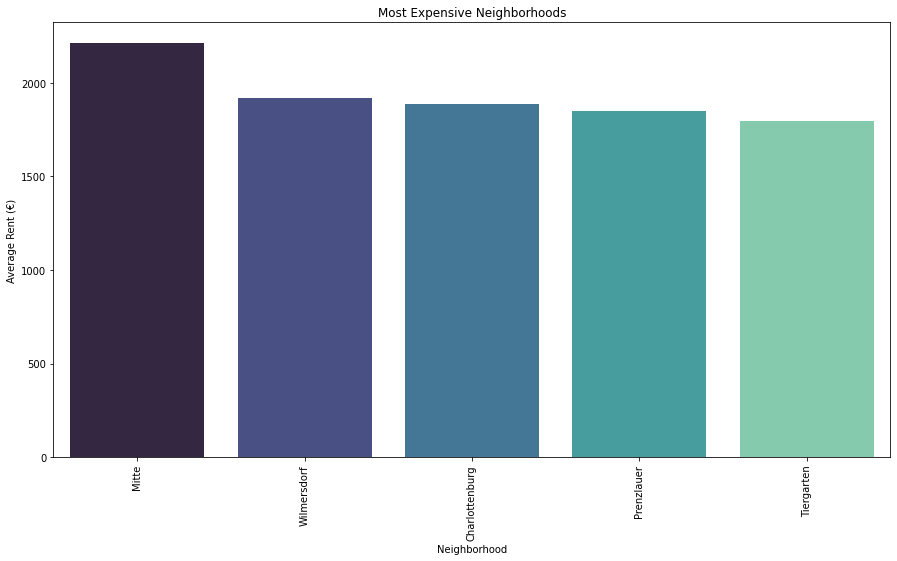

In [83]:
# Most expensive borough
exp_neighborhood = eda.groupby('regio3')['totalRent'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize = (15,8))
g = sns.barplot(x=exp_neighborhood.index, y=exp_neighborhood.values, palette='mako')
g.set(title = 'Most Expensive Neighborhoods', xlabel='Neighborhood', ylabel='Average Rent (€)')
plt.xticks(rotation=90)

### What are the cheapest areas?

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

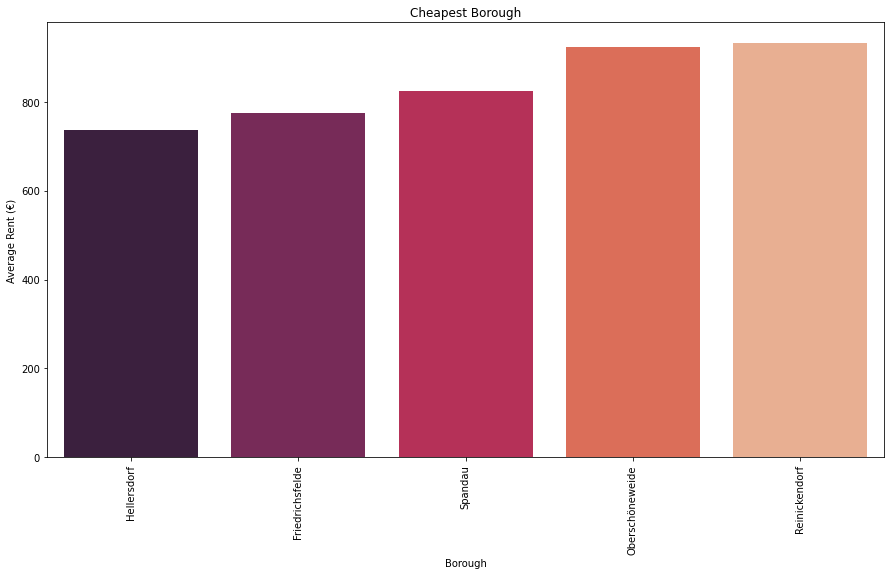

In [84]:
# Cheapest borough
cheap_borough= eda.groupby('regio3')['totalRent'].mean().sort_values(ascending=True).head(5)
plt.figure(figsize = (15,8))
g = sns.barplot(x=cheap_borough.index, y=cheap_borough.values, palette='rocket')
g.set(title = 'Cheapest Borough', xlabel='Borough', ylabel='Average Rent (€)')
plt.xticks(rotation=90)

### How much has rent increased in Berlin by time?

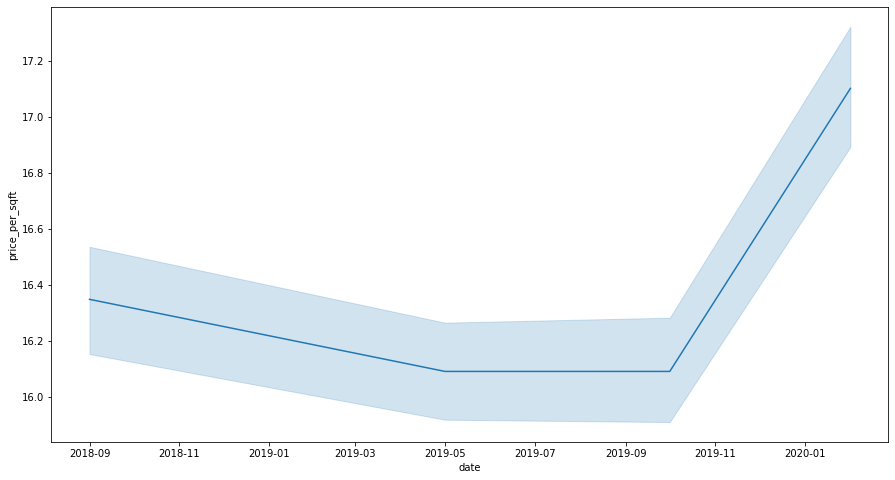

In [124]:
# Rent by time
rent_per_time = eda.groupby('date')['price_per_sqft'].mean()
plt.figure(figsize = (15,8))
g = sns.lineplot(x='date', y='price_per_sqft', data=eda)

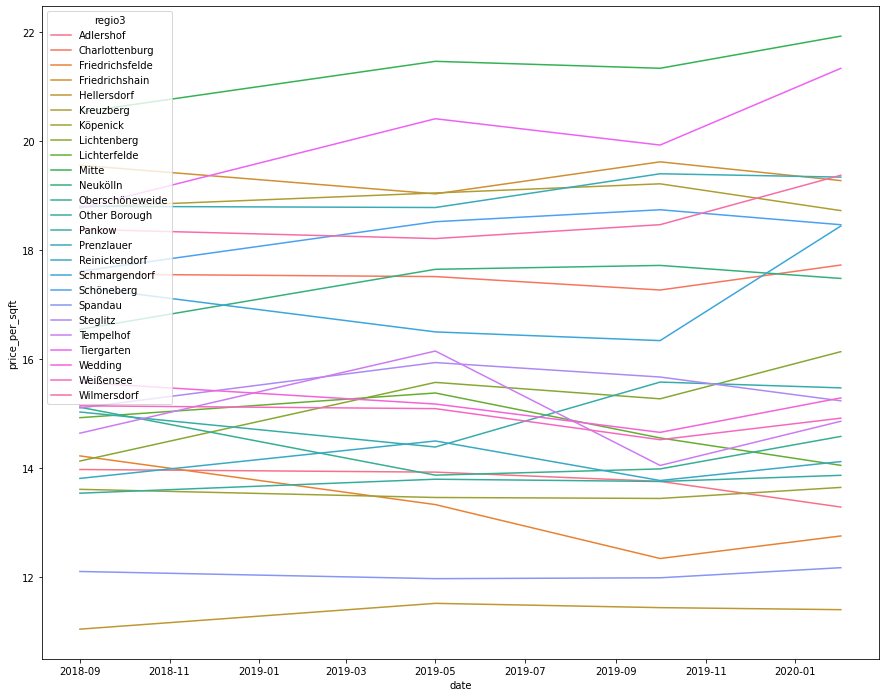

In [126]:
# Rent change by boroughs
rent_per_time = eda.groupby('date')['price_per_sqft'].mean()
plt.figure(figsize = (15,12))
g = sns.lineplot(x='date', y='price_per_sqft', data=eda, hue='regio3', ci=None)

### Is there any correlation between property listings' characteristics in Berlin?

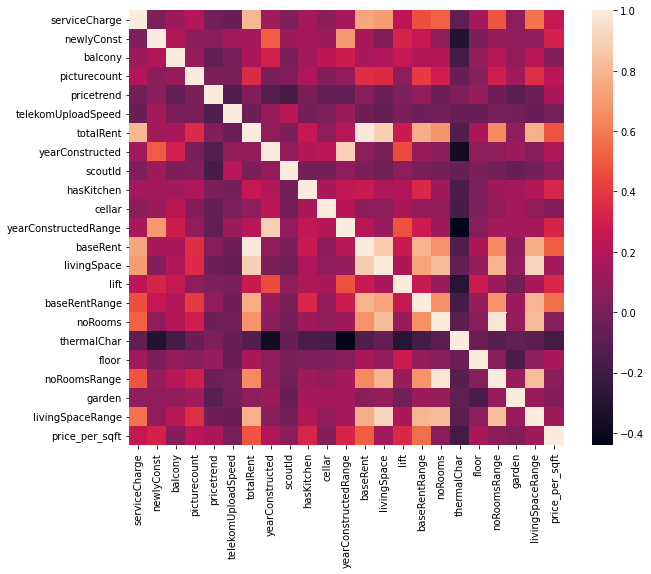

In [86]:
# Heatmap
fig, ax = plt.subplots(figsize=(10,8))
corr = eda.corr()
sns.heatmap(corr, square=True)

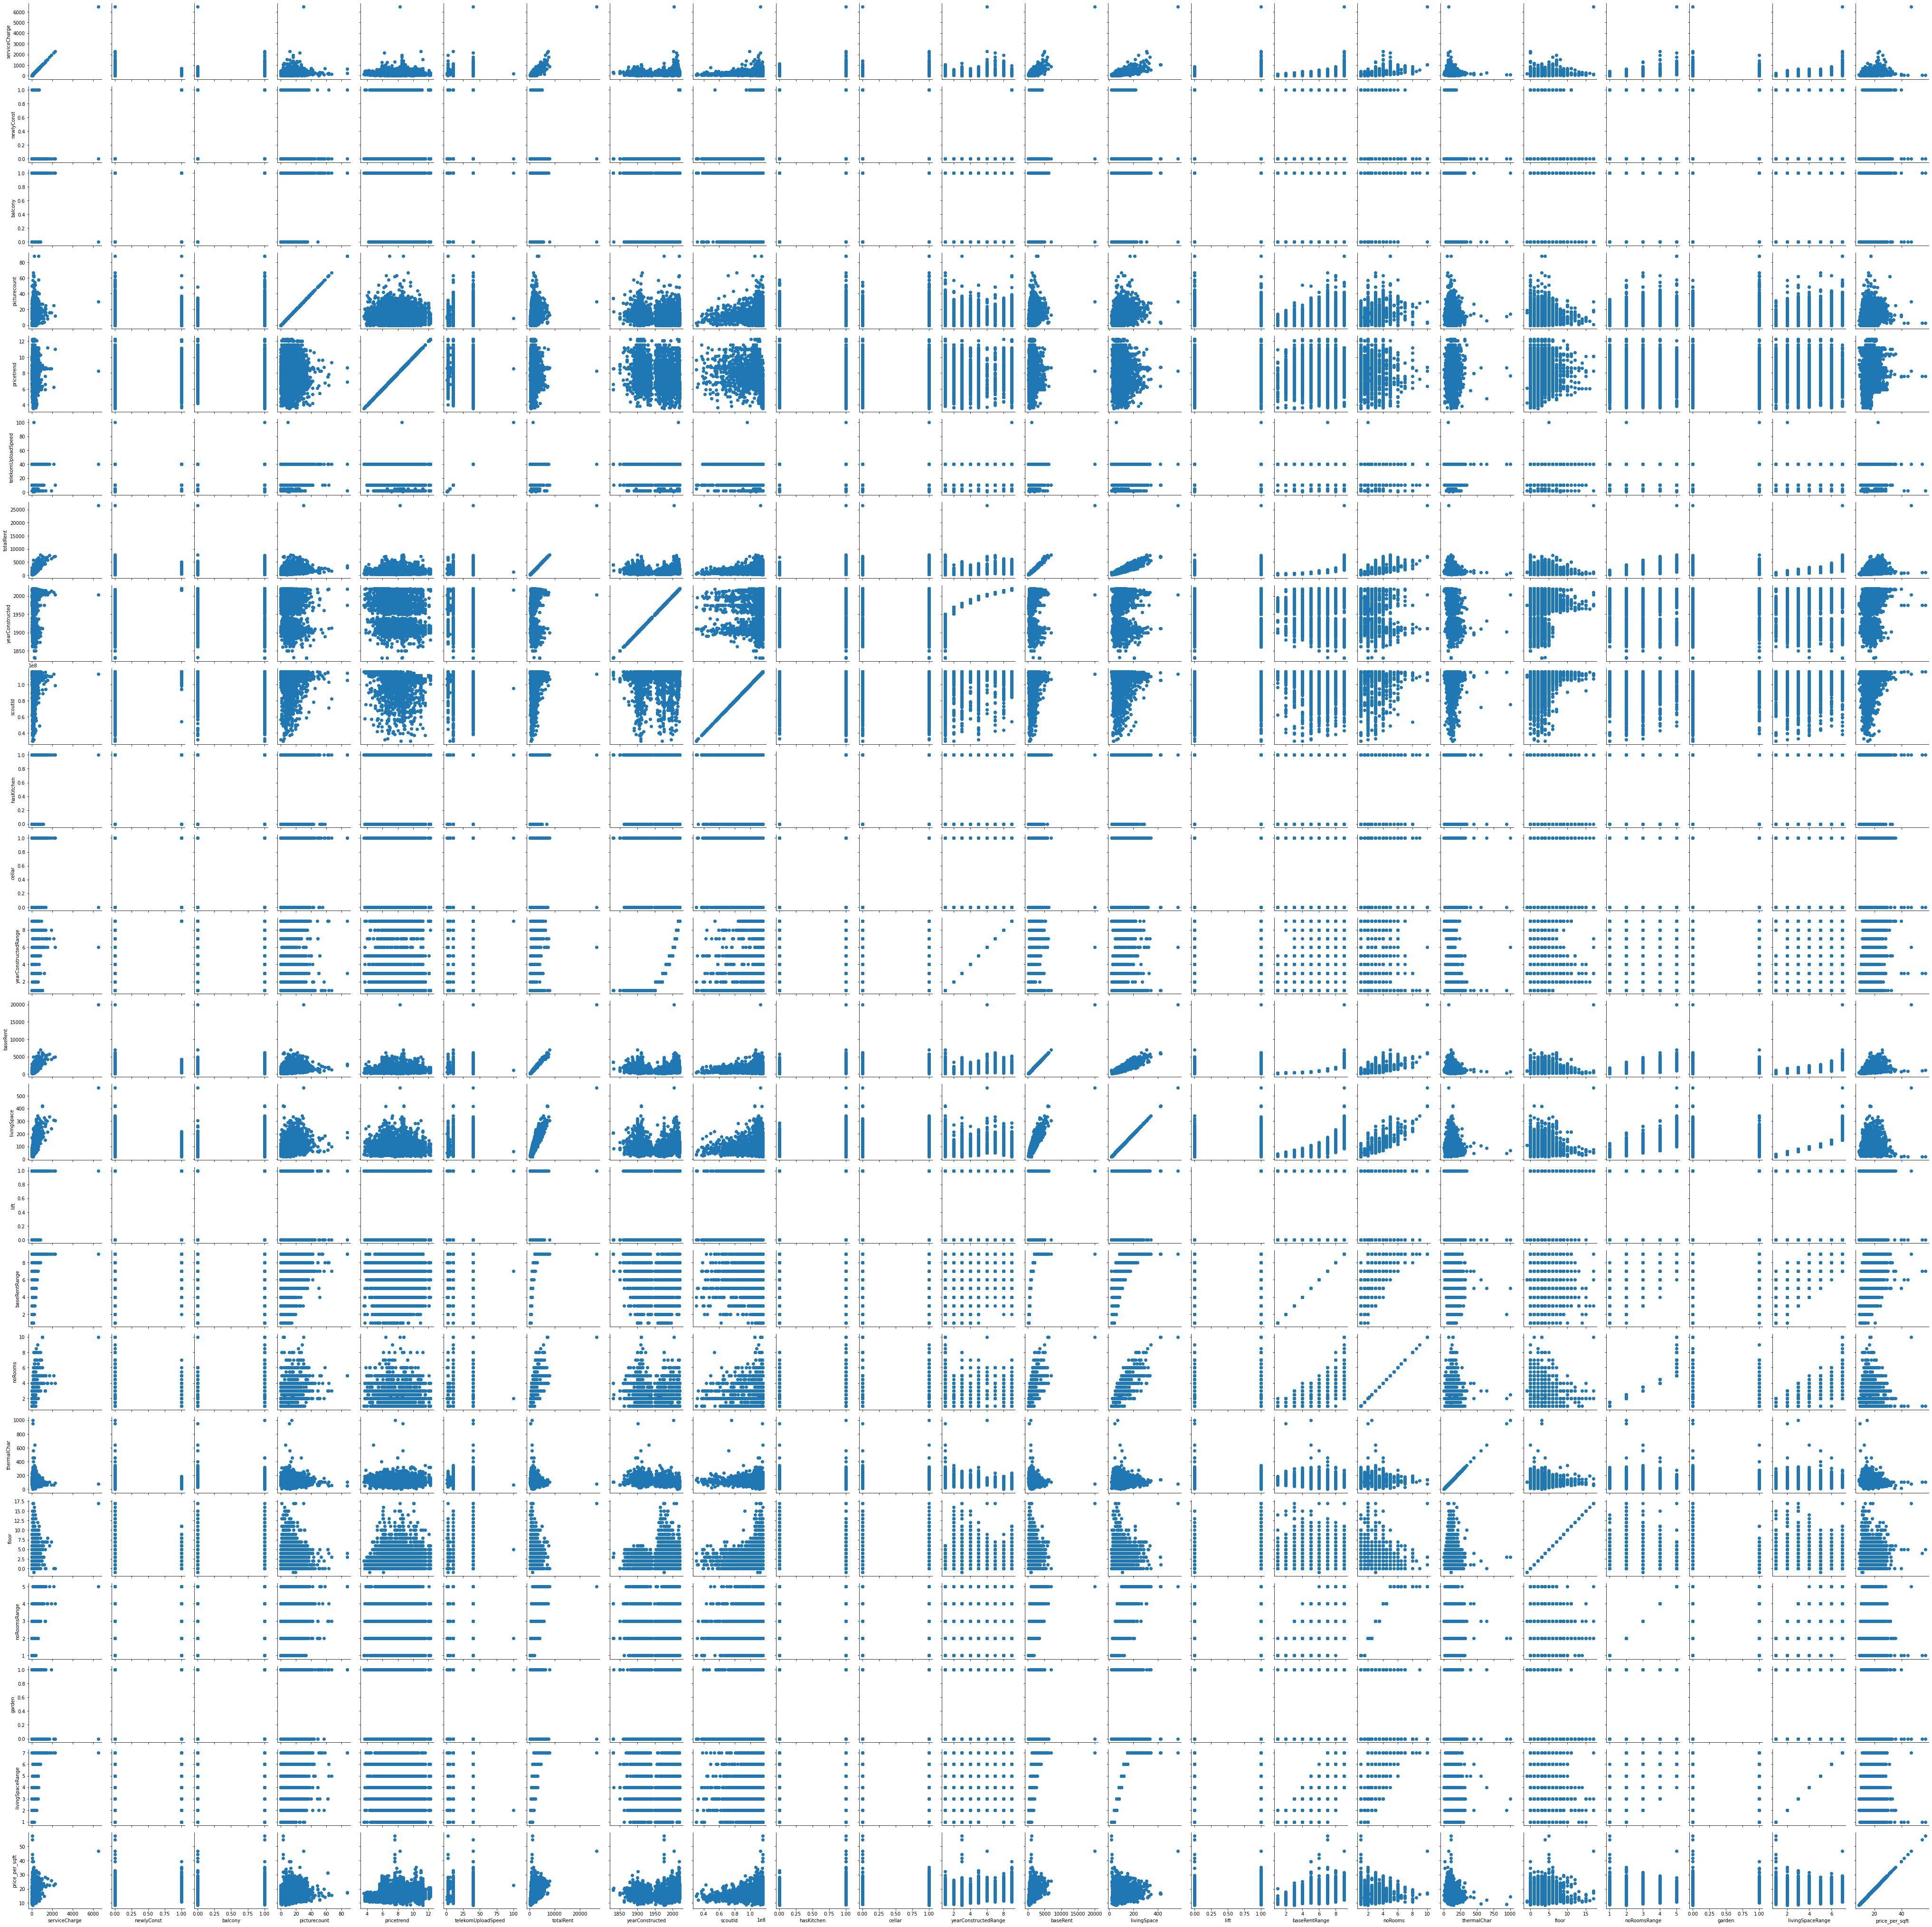

In [87]:
# Better view
g = sns.PairGrid(eda)
g.map(plt.scatter)

## Model

For the sake of this analysis, I decided to consider the living space area, the number of rooms, location, and heating type as features to fit our model.

In [88]:
berlin = df3.copy()
berlin = berlin[['livingSpace','noRooms','regio3','heatingType','totalRent']]
berlin.head()

,livingSpace,noRooms,regio3,heatingType,totalRent
0,70.00,2.5,Adlershof,gas_heating,970.00
1,45.74,2.0,Adlershof,central_heating,620.00
2,80.00,3.0,Adlershof,central_heating,1014.32
3,65.00,2.0,Adlershof,central_heating,847.00
4,121.99,4.0,Adlershof,central_heating,1981.00


In [89]:
berlin.shape

(6417, 5)

In [90]:
ber = pd.get_dummies(berlin, ['regio3', 'heatingType'], drop_first=True)

In [91]:
ber.shape

(6417, 39)

In [92]:
ber.head(2)

,livingSpace,noRooms,totalRent,regio3_Charlottenburg,regio3_Friedrichsfelde,regio3_Friedrichshain,regio3_Hellersdorf,regio3_Kreuzberg,regio3_Köpenick,regio3_Lichtenberg,...,heatingType_electric_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_heat_pump,heatingType_night_storage_heater,heatingType_oil_heating,heatingType_self_contained_central_heating,heatingType_solar_heating,heatingType_stove_heating,heatingType_wood_pellet_heating
0,70.00,2.5,970.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,45.74,2.0,620.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
X = ber.drop(['totalRent'],axis='columns')
y = ber.totalRent

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [95]:
# Reg
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9069348099896193

In [96]:
# Use K Fold cross validation to measure accuracy of our LinearRegression model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
# ShuffleSplit randomize the sample
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.91385396, 0.7692177 , 0.89411417, 0.75628377, 0.75479962])

In [106]:
# function cares about params too
def find_best_model(X,y):
    models = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for model_name, config in models.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': model_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    df_scores = pd.DataFrame(scores,columns=['model','best_score','best_params'])
    return df_scores

In [109]:
scores = find_best_model(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

In [111]:
scores

,model,best_score,best_params
0,linear_regression,0.817654,{'normalize': False}
1,lasso,0.817429,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.742446,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Performance of Models')

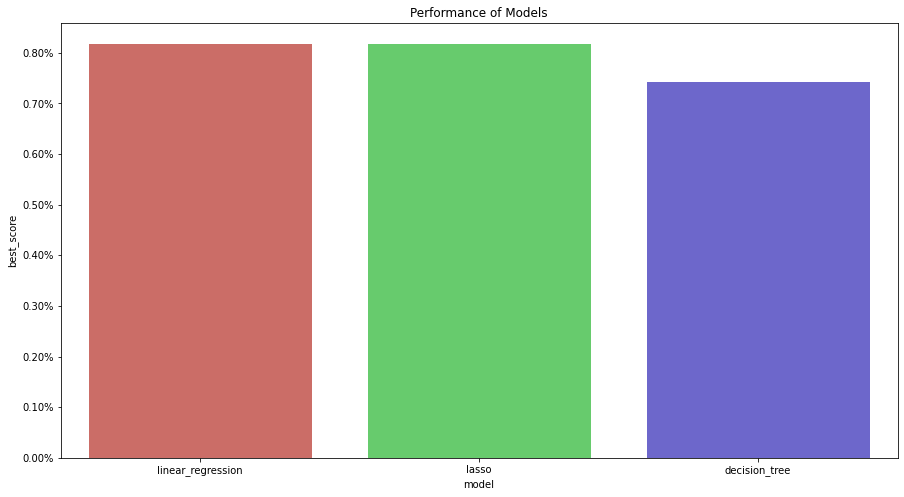

In [121]:
import matplotlib.ticker as mtick

plt.figure(figsize=(15,8))
ax = sns.barplot(scores.model, scores.best_score, data=scores, palette='hls')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('Performance of Models')